## Differential Evolution

In [1]:
from IPython.display import display_markdown
from pyIpnHeuristic.benchmark import get_pg06

problem_parameters = get_pg06()

objective_function = problem_parameters.get("objective_function")
g = problem_parameters.get("gx")
h = problem_parameters.get("hx")
ranges = problem_parameters.get("ranges")
markdown = problem_parameters.get("markdown")
x_best = problem_parameters.get("x")
fx_best = problem_parameters.get("fx")

display_markdown(markdown, raw=True)

## Problem G06:
Minimize: 
$$f(\mathbf{x}) = (x_1 - 10)^3 + (x_2 - 20)^3$$
subject to:
$$g_1(\mathbf{x}) = -(x_1-5)^2 - (x_2-5)^2 + 100 \leq 0 $$
$$g_2(\mathbf{x}) = (x_1-6)^2 + (x_2-5)^2 - 82.81 \leq 0 $$
where: $13 \leq x_1 \leq 100$, $0 \leq x_2 \leq 100$

## Initialize Differential Evolution

In [7]:
from pyIpnHeuristic.differentialEvolution import DifferentialEvolution

differentialEvolution = DifferentialEvolution(
    objective_function,
    soft_constrains=g,
    hard_constrains=h,
    ranges=ranges,
    population_size=4,
    smooth=False,
    epsilon=10**-4,
    f=10.**-2,
    cr=0.10,
)

differentialEvolution.search(iterations=10000, save_history=True)

## Results

In [10]:
import pandas as pd
import numpy as np

pd.DataFrame(
    sorted([{**hist, 
             "||xi-X||": np.linalg.norm(np.array(hist["x"]) - x_best),
             "fxi - Fx": hist["fx"] - fx_best} 
            for hist in differentialEvolution.history], key=lambda x: x["iteration"], reverse=True)
)

,x,fx,gx,hx,iteration,||xi-X||,fxi - Fx
0,"[36.16857510497294, 12.15929713712185]",17438.071752,878.588459,0,10000,24.805285,24399.885628
1,"[36.16857510497294, 12.15929713712185]",17438.071752,878.588459,0,9999,24.805285,24399.885628
2,"[36.16857510497294, 12.15929713712185]",17438.071752,878.588459,0,9998,24.805285,24399.885628
3,"[36.16857510497294, 12.15929713712185]",17438.071752,878.588459,0,9997,24.805285,24399.885628
4,"[36.16857510497294, 12.15929713712185]",17438.071752,878.588459,0,9996,24.805285,24399.885628
...,...,...,...,...,...,...,...
9995,"[36.440477085627194, 12.208307079264957]",18011.469150,895.772336,0,5,25.069732,24973.283025
9996,"[36.440477085627194, 12.208307079264957]",18011.469150,895.772336,0,4,25.069732,24973.283025
9997,"[36.440477085627194, 12.208307079264957]",18011.469150,895.772336,0,3,25.069732,24973.283025
9998,"[36.440477085627194, 12.208307079264957]",18011.469150,895.772336,0,2,25.069732,24973.283025


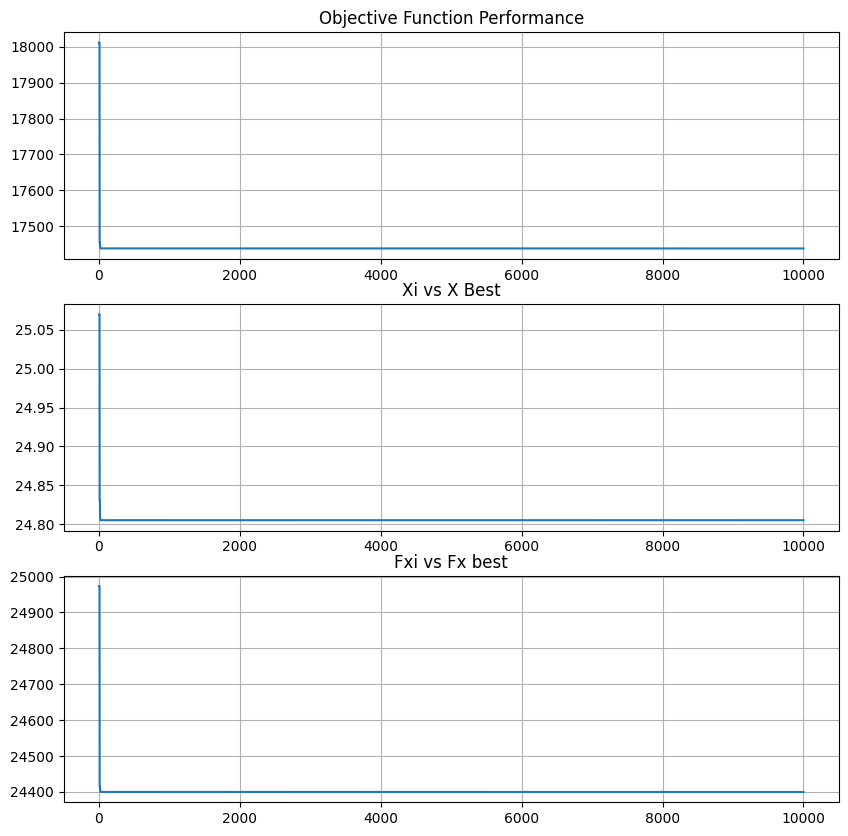

In [11]:
from _display import display_performance_results

rich_history = [{**hist, "||xi-X||": np.linalg.norm(np.array(hist["x"]) - x_best),
  "fxi - Fx": hist["fx"] - fx_best} for hist in differentialEvolution.history]
display_performance_results(rich_history)